<a href="https://colab.research.google.com/github/Anand1923/DSA_Assignments/blob/main/Case_Study_05_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#XYZ Company has offices in four different zones. The company wishes to investigate the following :

The mean sales generated by each zone.
Total sales generated by all the zones for each month.
Check whether all the zones generate the same amount of sales.
Help the company to carry out their study with the help of data provided.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales_data_zone_wise.csv')

In [5]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

There is no null values in the data

1. The mean sales generated by each zone.

In [5]:
df.describe()


,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [ ]:
df['mean'].plot(kind = 'bar')

In [22]:
data=df[['Zone - A','Zone - B','Zone - C','Zone - D']].mean().T

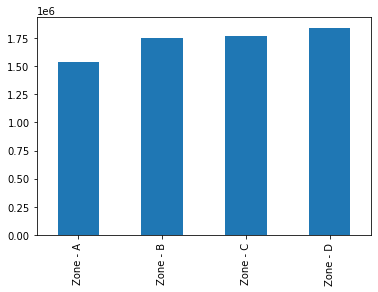

In [23]:
data.plot(kind='bar')

2. Total sales generated by all the zones for each month.


In [24]:
#Total sales for each month
df['Total Sales'] = df[['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D']].sum(axis=1) 
df[['Month','Total Sales']]

,Month,Total Sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


The maximum sales was in the Month4 and minimum  in month13.



3. Check whether all the zones generate the same amount of sales.

Hypostesis

H0 NULL = All Zones generate the same amount of sales
H1 ALTERNATE = All zones generate Sales of atleast one Zone differs

In [25]:
from scipy.stats import f_oneway
stat, pvalue = f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])
print('Stats = ',stat)
print('P-Value = ',pvalue)

Stats =  5.672056106843581
P-Value =  0.0011827601694503335


In [26]:
if pvalue < 0.05:
    print('Reject the Null Hypothesis : All Zones generate same amount of sales')
else:
    print('Reject Alternate Hypothesis: All zones generate Sales of atleast one Zone differs')

Reject the Null Hypothesis : All Zones generate same amount of sales
